# VAPOR Guide

In [1]:
# Required Modules
%matplotlib inline

import core as cor
import support as sup
import plotter as plo
import convenience as con

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display

from astropy import units as u, constants as c
from astropy.constants import au

The Velocity And POsition Reconstruction (VAPOR) mapping tool is designed to perform Line-of-Sight CME tracking in real time with white-light polarization measurements. It relies on scattering geometry of polarized light, and the methods behind this are outlined in https://arxiv.org/pdf/2511.00714. The distance to an object $l$ can be obtained by combining the projected elongation angle $\epsilon$ with measurements of total brightness $(tB)$ and excess polarized brightness $(pB)$, and their ratio $p = pB/tB$. The polarization ratio $(PR)$ can be expressed as a separable function of scattering angle and scattering function (see Billings, 1966; Inhester, 2015).

As the derivation has a built in degeneracy with two output solutions, one positive, the second negative, two solutions are always supplied to the end user, rather than including tracking software to conclude which is the unrealistic solution.


The VAPOR package is comprised of 5 main components:
 - core - which contains the functions used for calculating line of sight distances
 - polarization - a wrapper for the solpolpy package which makes polarization transformation
 - errors - derives error values for each pixel
 - support - these are support modules required by core
 - plotter - contains all plotting algorithms
 - convenience - extra functions for end user convenience, but not always required

To explain each package of functions a series of seperate docs have been generated and should be read in this order for a full understanding:
 - doc_01_overview.ipynb
 - doc_02_convenience.ipynb
 - doc_03_support.ipynb
 - doc_04_core.ipynb
 - doc_05_plotter.ipynb

This document shows basic functionality to produce a plot

In [2]:
# import some data
tb_base_fits="./test_data/stereo/20121109_000915_B_base.fts"
pb_base_fits="./test_data/stereo/20121109_000915_pB_base.fts"

tb_fits="./test_data/stereo/20121109_030915_B.fts"
pb_fits="./test_data/stereo/20121109_030915_pB.fts"

base_fits_file_list=[tb_base_fits, pb_base_fits]
fits_file_list=[tb_fits, pb_fits]

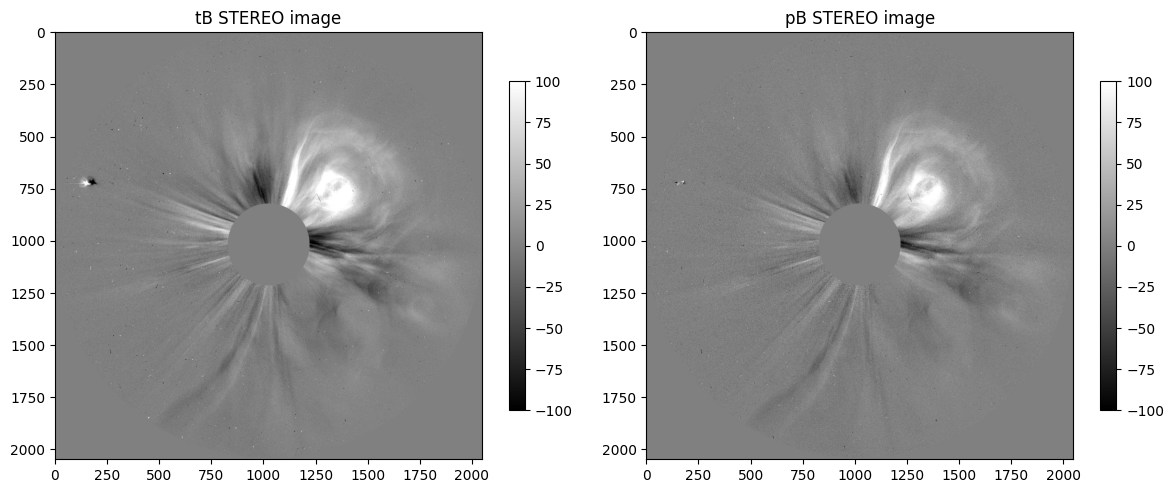

In [3]:
# display the data using the import data module and the convenience module image displayer
tb_data, pB_data, tb_header, pb_header = sup.import_data(fits_file_list, subtract_base_image=True, base_file_list=base_fits_file_list)

clip_tb_data = np.clip(tb_data, -100, 100)
clip_pb_data = np.clip(pB_data, -100, 100)

# view tB, pB pair, both have been masked by default
con.show_2_images(clip_tb_data, clip_pb_data,  title1="tB STEREO image", title2="pB STEREO image")

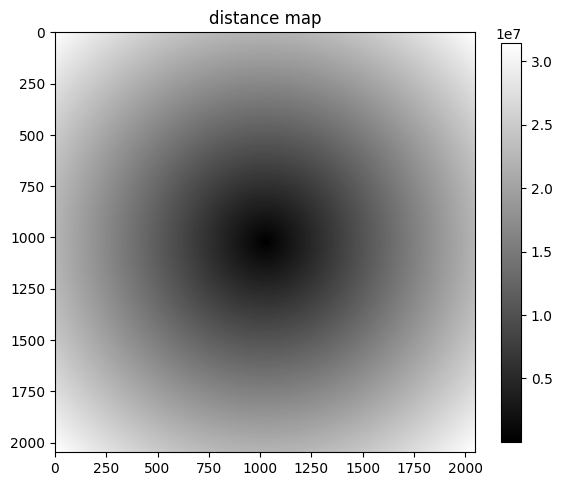

In [4]:
# create a distance map using the above stereo data
distance_map = sup.create_distance_map(fits_file_list)

# view distance map, each pixel has its distance from the sun center this is needed to make a line of sight derivation
con.show_1_image(distance_map,  title1="distance map")

In [5]:
# define distance to observer, assuming L1
dist_in_km=con.to_km(1, unit="L1")
print("L1 = ", dist_in_km, "km" )

L1 =  148097870.70000002 km


In [6]:
# create data distance data, we will look at r_plu and r_minus in this notebook, which shows distance from the Sun to the scattering point (foreground/background).
r_plus, r_minus, l_plus, l_minus, tau_plus, tau_minus, x_plus, x_minus = cor.radial_position_ps(tb_data, pB_data, distance_map, dist_in_km)

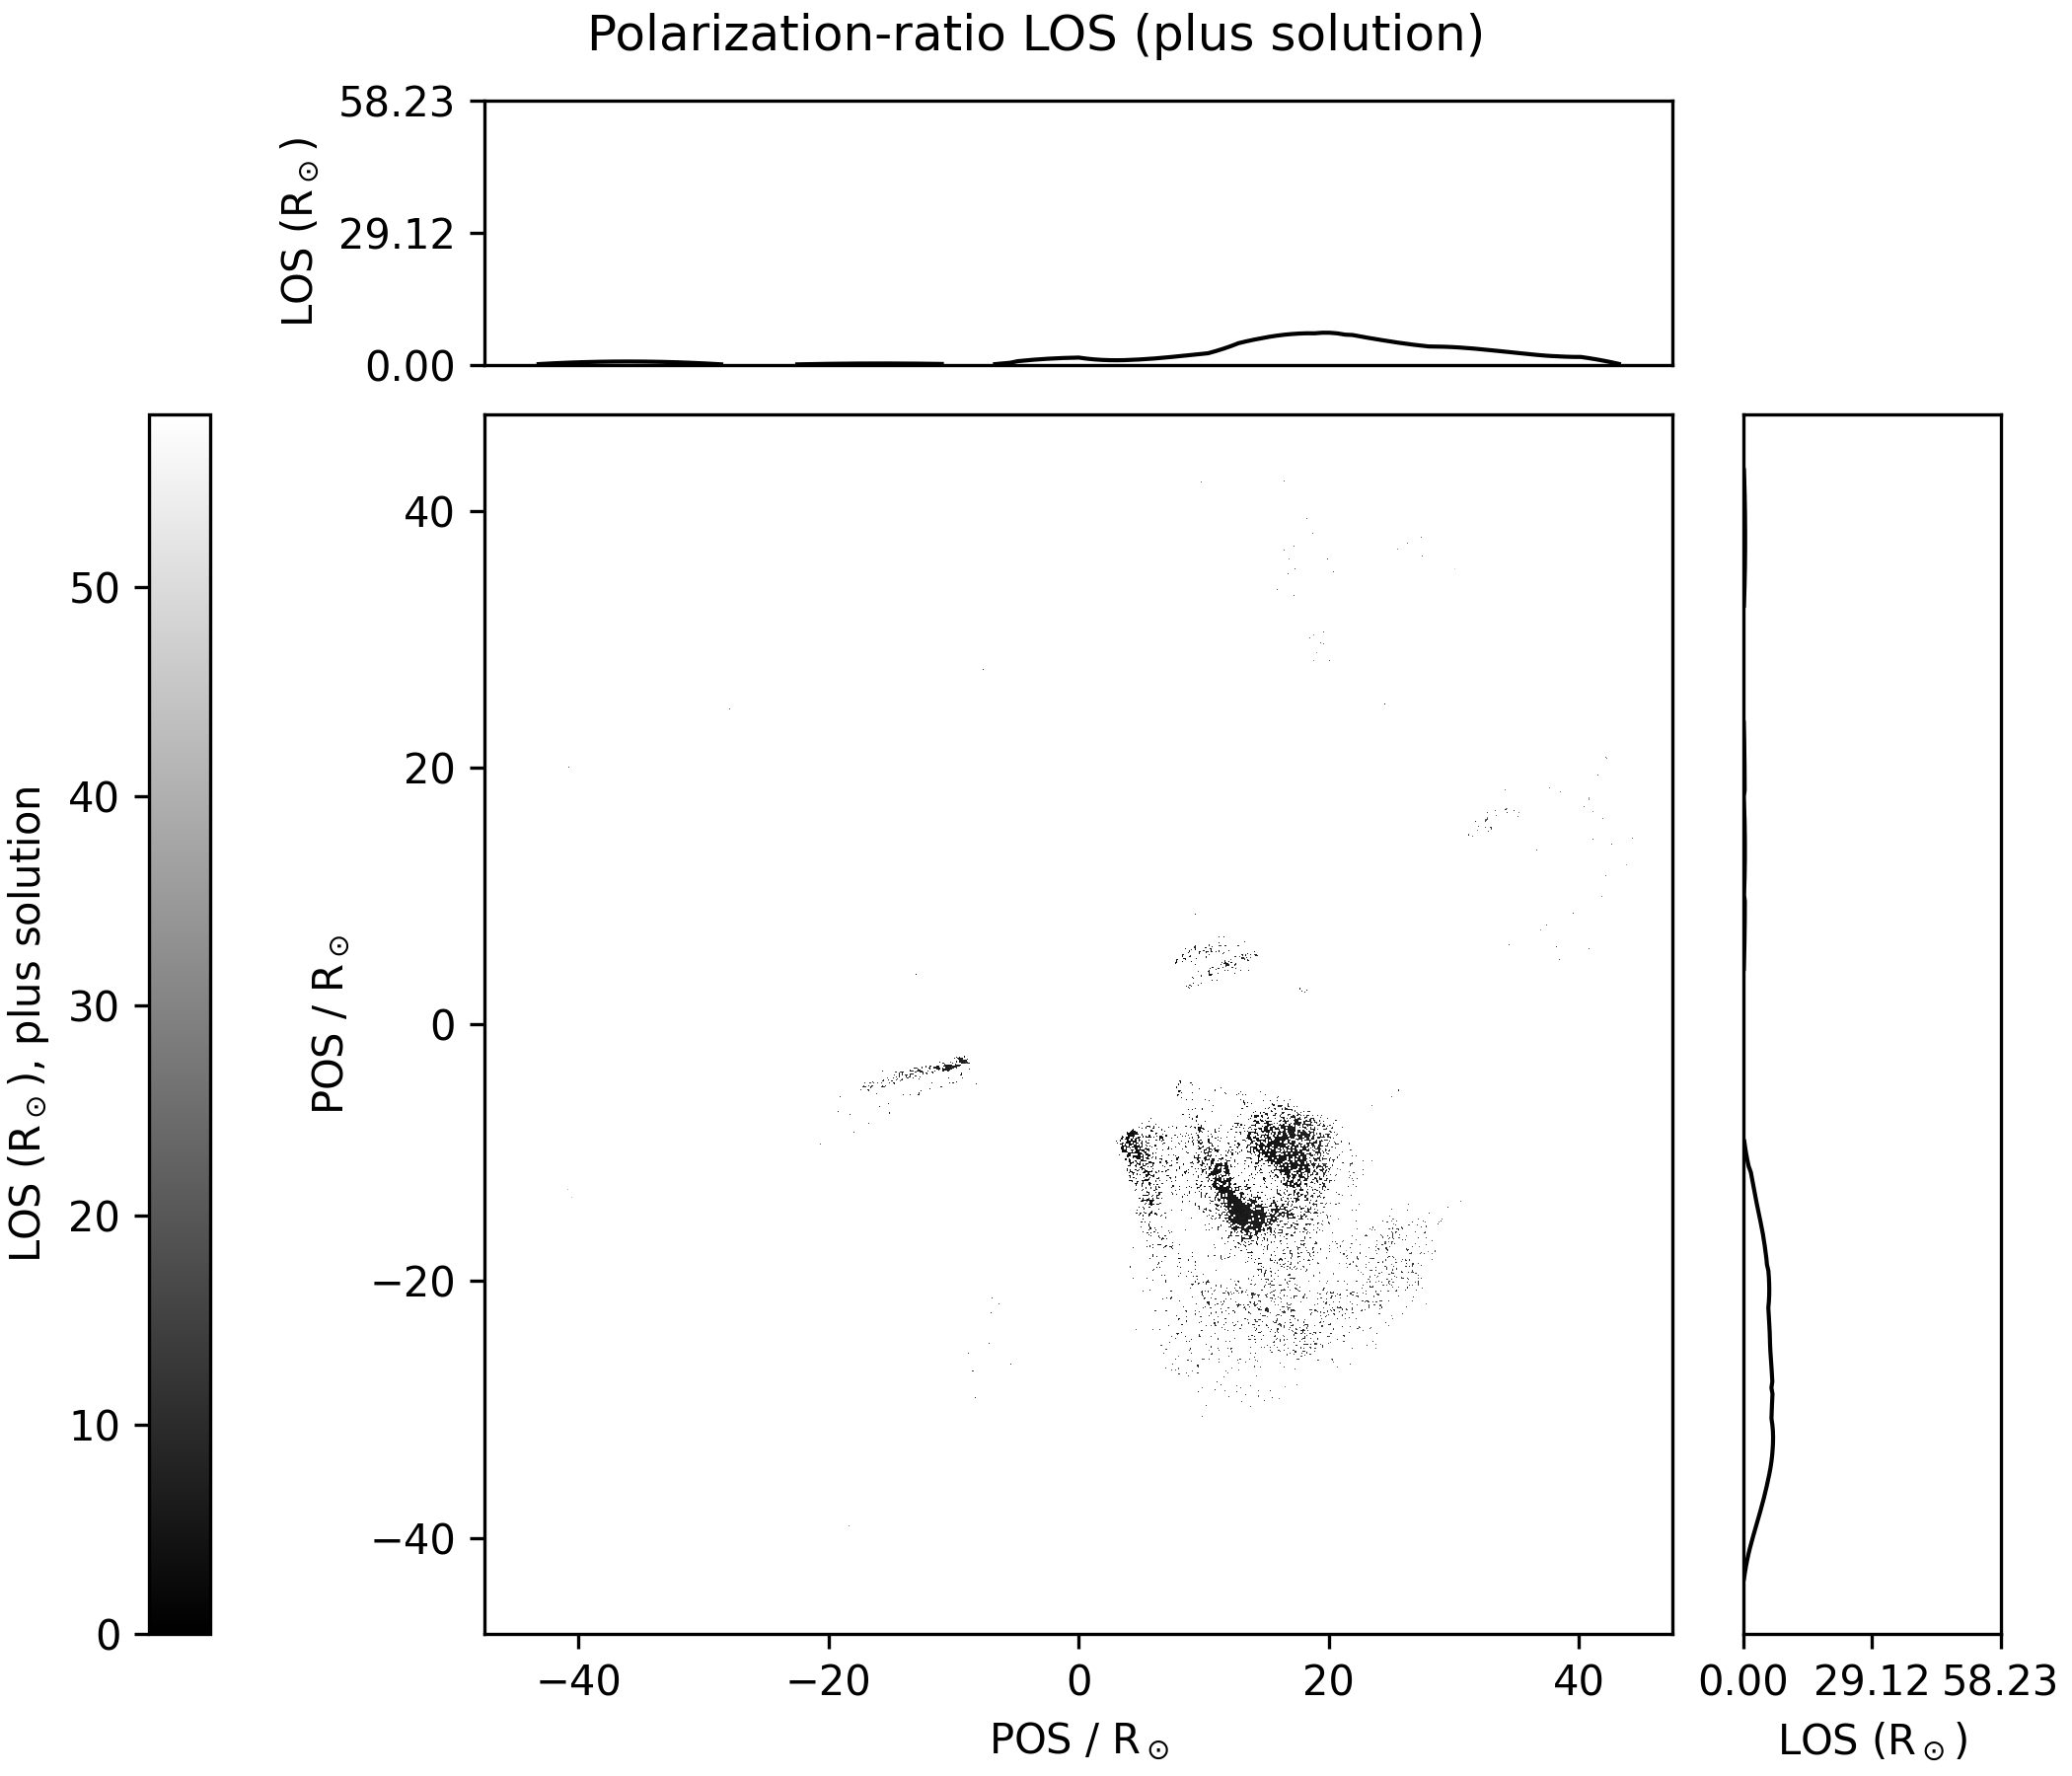

In [7]:
# create a positive solution plot
plo.create_triple_stereo_plot(tb_data, pB_data, distance_map, dist_in_km, solution = "plus")

# display the plot
display(Image(filename="triple_plot_plus.png"))